Nama : Faris Adnan Lugas

Peserta : Digitalent FGA

Program : Machine Learning

Data : Time series Cuaca New Delhi

In [1]:
# install paket kaggle 
!pip install -q kaggle

In [2]:
# upload file kaggle melalui penyimpanan lokal
from google.colab import files
files.upload()

Saving delhi-weather-data.zip to delhi-weather-data.zip


{'delhi-weather-data.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xd6i4O)H5\xe7\xff\xff\xff\xff\xff\xff\xff\xff\x0b\x00\x14\x00testset.csv\x01\x00\x10\x00\xe4\x83e\x00\x00\x00\x00\x00=\xf3\x0f\x00\x00\x00\x00\x00\xac\xbd\xdd\xd2-7r\x1dx?O\xd1\x0f\xb0\xf9M\x01\xa8\xdf\xbesxz\xc2\x17V[a\xd9\xa3K\x07\x83\xa4E\x86\xd8\xa4\x82d\xabGzz\xef]\x95Y\xb5\x16\xb0\x12\xbb>\x1eI\x11\xbd\xc9\xc3\x93\xabP(`e"\xff\xf0\xed\xd7\xbf}\xf7\xdb\x0f\x7f\xf9\xee\x7f\xfd\xf5\xb7o\x1e\x7f\xf8_\xdf\xfc\xfc\xd3\xb7\xbf>\x7f\xbf\xfd\xeeo\xff\xf2\xdb_\x9e\xff\xf0\xbf\x7f\xfe\xa7\xe7\xff~\xff\xf5\x0f?\xbe~\xbe\xfb\xfa\xb7\x1f~\xfa\xf6\xbb\xff\xff\xf5_\xbe\xff\xeb\xeb\x7f\xff\xe5\x97\xef\xbe\xf9\xe1_\xec\x9f~\xfd\xf5\xaf\xbf|\xf7\xfa\xe7_\xbe\xfe\xe1\xa7\xe7\xcf\xaf?\xfd\xfc\xb7\xe7\xcfo\xdf\xfde\xff\x1b\xbf}\xff\xd7\xa7\xf0/\xaf\x7f\xfa\xf9\x97\x9f\xbe\xfe\xf6\xe7\xe7?\xfd\xeb\x0f\xbf\xbe\xfe\xd3\xdf\xbe\xfd\xe1\x97o\xed\xf7\xbb\xd7\xef?\xfd\xf5\xd7\xfd\xf9\x7f{>\xef\x9b\xef\x7f\xf8\xf1\xc7\xfd_~\xfd\x97o\xff\xf2\x7f\xa5m

In [3]:
# unzip
!mkdir delhi-weather-data
!unzip delhi-weather-data.zip -d delhi-weather-data
!ls delhi-weather-data

Archive:  delhi-weather-data.zip
  inflating: delhi-weather-data/testset.csv  
testset.csv


In [4]:
#Import Library yang dibutuhkan
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

#Load Dataset
data_latih = pd.read_csv('delhi-weather-data/testset.csv')
data_latih.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
# total data
data_latih.shape

(100990, 20)

In [6]:
# data info
data_latih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [7]:
# null check
data_latih.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [8]:
data_latih['datetime_utc']=pd.to_datetime(data_latih['datetime_utc'])
data_latih['datetime_utc'].head()
data_latih[' _tempm'].fillna(data_latih[' _tempm'].mean(), inplace=True) # we will fill the null row
data_latih = data_latih[['datetime_utc',' _tempm' ]]
data_latih.head()

,datetime_utc,_tempm
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [9]:
data_latih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime_utc  100990 non-null  datetime64[ns]
 1    _tempm       100990 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


# Model dan Plot

In [10]:
delhi=data_latih[['datetime_utc',' _tempm']].copy()
delhi['just_date'] = delhi['datetime_utc'].dt.date

delhifinal=delhi.drop('datetime_utc',axis=1)
delhifinal.set_index('just_date', inplace= True)
delhifinal.head()

,_tempm
just_date,
1996-11-01,30.0
1996-11-01,28.0
1996-11-01,24.0
1996-11-01,24.0
1996-11-01,23.0


In [11]:
delhifinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100990 entries, 1996-11-01 to 2017-04-24
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0    _tempm  100990 non-null  float64
dtypes: float64(1)
memory usage: 1.5+ MB


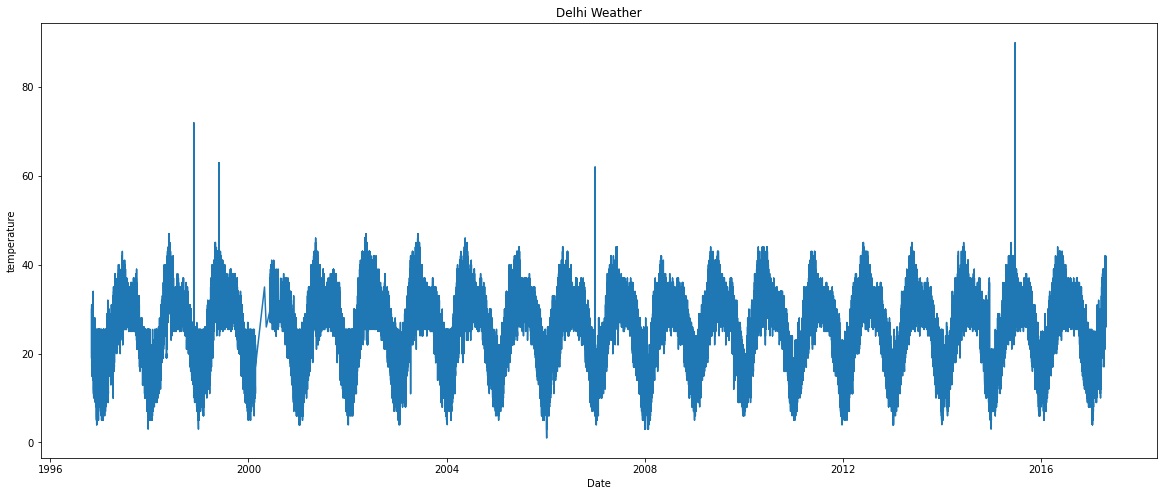

In [12]:
plt.figure(figsize=(20,8))
plt.plot(delhifinal)
plt.title('Delhi Weather')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

In [13]:
# Mengambil nilai dari data
date = data_latih['datetime_utc'].values
temp = data_latih[' _tempm'].values

In [14]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(temp, date, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

80792 20198


In [25]:
#Model 
from keras.layers import Dense, LSTM

data_x_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=5000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
max = data_latih[' _tempm'].max()
print('Max value : ' )
print(max)

Max value : 
90.0


In [18]:
min = data_latih[' _tempm'].min()
print('Min Value : ')
print(min)

Min Value : 
1.0


In [19]:
x = (90.0 - 1.0) * (10 / 100)
print(x)

8.9


In [20]:
#Menjalankan fungsi callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [21]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_x_train ,epochs=20, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/20
808/808 [==============================] - 55s 25ms/step - loss: 12.9540 - mae: 13.4444 - val_loss: 10.0759 - val_mae: 10.5625
Epoch 2/20
808/808 [==============================] - 19s 23ms/step - loss: 9.0253 - mae: 9.5113 - val_loss: 8.0348 - val_mae: 8.5185
Epoch 3/20
808/808 [==============================] - 19s 23ms/step - loss: 7.4058 - mae: 7.8887 - val_loss: 6.8270 - val_mae: 7.3086

MAE of the model < 10% of data scale


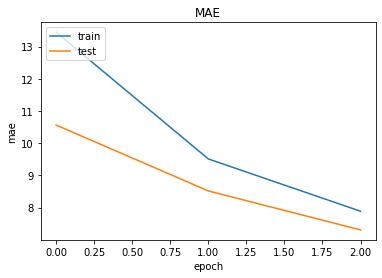

In [22]:
# plot dari mae
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

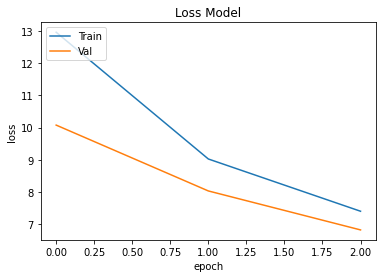

In [23]:
# plot dari loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()